In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

In [5]:
# Chargement des données
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [6]:
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [10]:

from sklearn.metrics import accuracy_score

# Plages des paramètres à tester
C_values = [0.1, 1, 10]
gamma_values = [0.01, 0.1, 0.5]


# Entraîner et évaluer le modèle pour chaque combinaison de C et gamma
for C in C_values:
    for gamma in gamma_values:
        # Création du classifieur SVM RBF
        clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
        clf.fit(X_train, y_train)
        
        # Prédire sur le jeu de test
        y_pred = clf.predict(X_test)
        
        # Calculer la précision
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Précision pour C={C}, gamma={gamma}: {accuracy:.2f}")

Précision pour C=0.1, gamma=0.01: 0.25
Précision pour C=0.1, gamma=0.1: 0.63
Précision pour C=0.1, gamma=0.5: 0.92
Précision pour C=1, gamma=0.01: 0.85
Précision pour C=1, gamma=0.1: 0.96
Précision pour C=1, gamma=0.5: 0.97
Précision pour C=10, gamma=0.01: 0.95
Précision pour C=10, gamma=0.1: 0.99
Précision pour C=10, gamma=0.5: 0.97


Les meilleurs paramètres sont  : C = 10 et gamma = 0.1

# Affichage de la frontière pour ces meilleurs paramètres

Text(0.5, 1.0, 'SVM RBF')

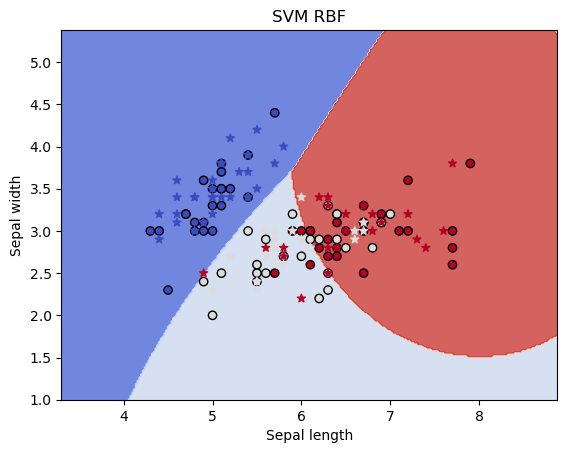

In [13]:
X, y = iris.data[:,:2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
clf = svm.SVC(C=10, kernel='rbf', gamma=0.1)
clf.fit(X_train, y_train)
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = .02
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Surface de décision
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', 
c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, 
cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM RBF")

Nous remarquons que les frontières de séparations ne sont plus des droites (linéaires) et le modèles sépares mieux les classes

# Application sur le jeu de données Digits

In [14]:
# Chargement des données
from sklearn.datasets import load_digits


digits = load_digits()
X, y = digits.data, digits.target
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(1797, 64)
(1797,)


# SVM avec un noyau linéaire 

In [18]:
C_values = [0.01, 0.1, 1, 10, 100]

# 1. SVM Linéaire

for C in C_values:
    # SVM avec noyau linéaire
    linear_svm = svm.SVC(kernel='linear', C=C)
    linear_svm.fit(X_train, y_train)
    
    # Prédiction
    y_pred = linear_svm.predict(X_test)
    
    # Calcul de la précision
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Précision SVM linéaire avec C={C}: {accuracy:.2f}")

Précision SVM linéaire avec C=0.01: 0.97
Précision SVM linéaire avec C=0.1: 0.97
Précision SVM linéaire avec C=1: 0.97
Précision SVM linéaire avec C=10: 0.97
Précision SVM linéaire avec C=100: 0.97


# SVM avec un noyau gaussien 

In [16]:
# 2. SVM à noyau gaussien (RBF) avec gamma='auto' et 'scale'

gamma_values = ['auto', 'scale']

for C in C_values:
    for gamma in gamma_values:
        # SVM avec noyau RBF
        rbf_svm = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        rbf_svm.fit(X_train, y_train)
        
        # Prédiction
        y_pred_rbf = rbf_svm.predict(X_test)
        
        # Calcul de la précision
        accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
        print(f"Précision SVM RBF avec C={C} et gamma={gamma}: {accuracy_rbf:.2f}")

Précision SVM RBF avec C=0.1 et gamma=auto: 0.08
Précision SVM RBF avec C=0.1 et gamma=scale: 0.95
Précision SVM RBF avec C=1 et gamma=auto: 0.41
Précision SVM RBF avec C=1 et gamma=scale: 0.99
Précision SVM RBF avec C=10 et gamma=auto: 0.46
Précision SVM RBF avec C=10 et gamma=scale: 0.98


Les meilleurs paramètres sont C = 1 et gamma = scale

Dans scikit-learn, le paramètre gamma par défaut est gamma='scale'.

Cette option calcule automatiquement une valeur de gamma basée sur les données. La formule utilisée est : gamma = 1 /(nbre de caractéristiques * var(X))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

# Charger le jeu de données Digits
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Réaliser une ACP et garder les 2 premières composantes principales
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Créer une grille pour afficher la surface de décision
h = .02  # Taille de la grille
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


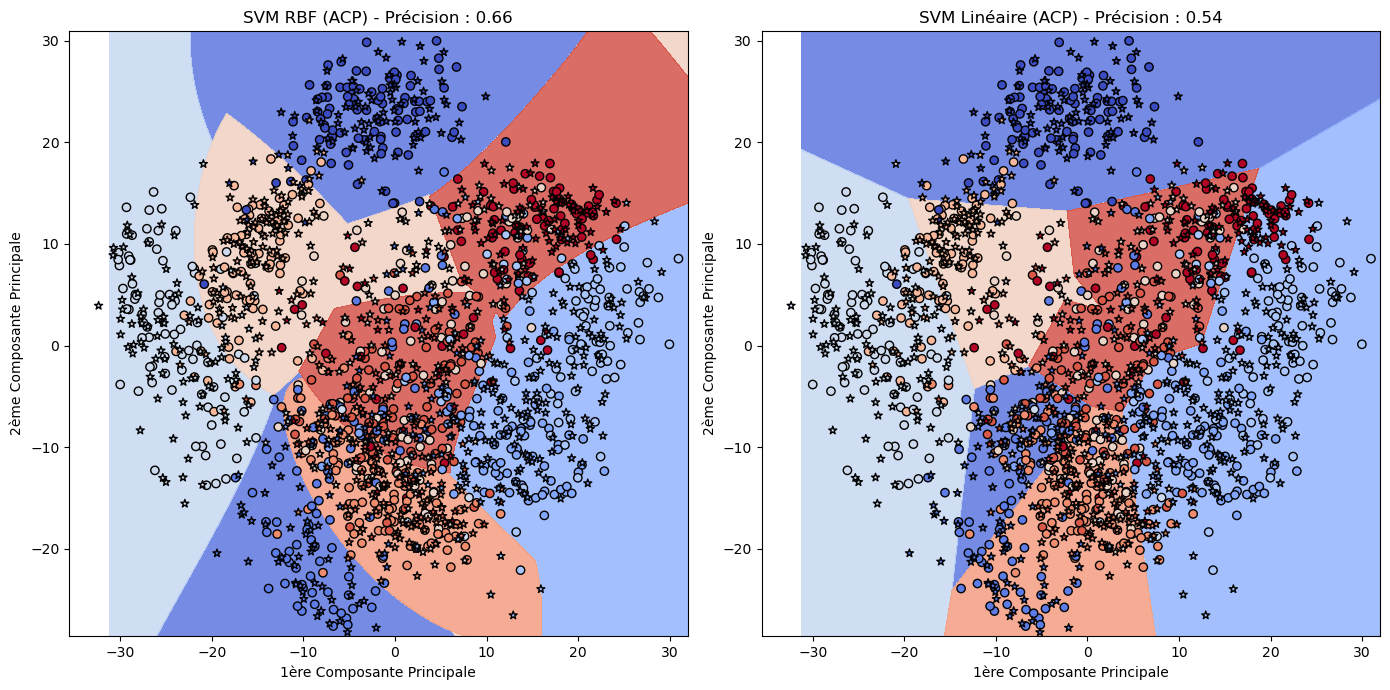

Précision SVM RBF avec ACP : 0.66
Précision SVM Linéaire avec ACP : 0.54


In [4]:
# Initialiser et entraîner le modèle SVM à noyau gaussien (RBF)
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, max_iter=10000)
svm_rbf.fit(X_train_pca, y_train)

# Prédire et évaluer le modèle SVM RBF
y_pred_rbf = svm_rbf.predict(X_test_pca)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Afficher la surface de décision pour le SVM RBF
Z_rbf = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

plt.figure(figsize=(14, 7))

# Surface de décision pour SVM RBF
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm, label="train")
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', marker='*', cmap=plt.cm.coolwarm, label="test")
plt.title(f'SVM RBF (ACP) - Précision : {accuracy_rbf:.2f}')
plt.xlabel('1ère Composante Principale')
plt.ylabel('2ème Composante Principale')



# Initialiser et entraîner le modèle SVM linéaire
svm_linear = LinearSVC(max_iter=10000)
svm_linear.fit(X_train_pca, y_train)

# Prédire et évaluer le modèle SVM linéaire
y_pred_linear = svm_linear.predict(X_test_pca)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Afficher la surface de décision pour le SVM linéaire
Z_linear = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

# Surface de décision pour SVM linéaire
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm, label="train")
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', marker='*', cmap=plt.cm.coolwarm, label="test")
plt.title(f'SVM Linéaire (ACP) - Précision : {accuracy_linear:.2f}')
plt.xlabel('1ère Composante Principale')
plt.ylabel('2ème Composante Principale')

plt.tight_layout()
plt.show()

# Afficher les précisions
print(f"Précision SVM RBF avec ACP : {accuracy_rbf:.2f}")
print(f"Précision SVM Linéaire avec ACP : {accuracy_linear:.2f}")


La SVM à noyau donne une meilleure précision que la SVM linéaire. Néaumoins, les résultats des deux modèles ne sont pas satisfaisants avec seulement deux composantes


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Charger le jeu de données Digits
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Définir les paramètres à tester
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]  # seulement pour le noyau polynomial
}

# Initialiser le classifieur SVC
svc = SVC()

# Créer une instance de GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Exécuter la recherche par grille
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs paramètres
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Évaluer le modèle sur l'ensemble de test
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Afficher les résultats
print("Meilleurs paramètres trouvés :")
print(best_params)
print(f"Score de classification en test : {accuracy:.4f}")


Meilleurs paramètres trouvés :
{'C': 10, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
Score de classification en test : 0.9878


# Combien de composantes faut-il garder au minimum dans l’ACP pour classer correctement au moins 97% des images 

Nombre de composantes nécessaires pour atteindre 97% de variance : 34
Variance expliquée par 34 composantes : 0.9730
Facteur de réduction de dimension : 1.88


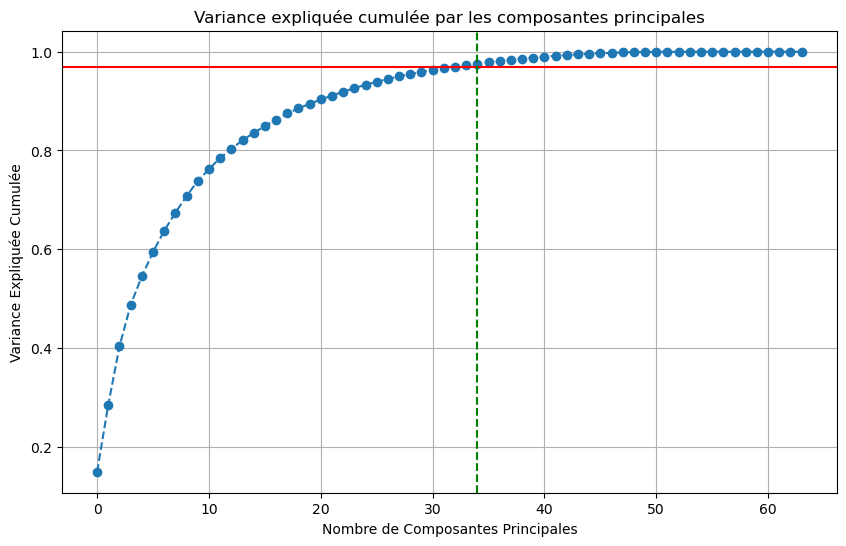

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# Charger le jeu de données Digits
digits = datasets.load_digits()
X = digits.data

# Réaliser une ACP
pca = PCA()
pca.fit(X)

# Calculer la variance expliquée cumulée
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Trouver le nombre de composantes nécessaires pour atteindre 97% de la variance expliquée
n_components = np.argmax(cumulative_variance >= 0.97) + 1  # +1 car np.argmax retourne l'indice
variance_explained = cumulative_variance[n_components - 1]  # Variance expliquée par les n_components

# Calculer le facteur de réduction de dimension
initial_dimensions = X.shape[1]  # Nombre initial de dimensions
reduction_factor = initial_dimensions / n_components

# Afficher les résultats
print(f"Nombre de composantes nécessaires pour atteindre 97% de variance : {n_components}")
print(f"Variance expliquée par {n_components} composantes : {variance_explained:.4f}")
print(f"Facteur de réduction de dimension : {reduction_factor:.2f}")

# Afficher la courbe de la variance expliquée cumulée
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.97, color='r', linestyle='-')
plt.axvline(x=n_components, color='g', linestyle='--')
plt.title('Variance expliquée cumulée par les composantes principales')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Expliquée Cumulée')
plt.grid()
plt.show()


In [7]:
X.shape

(1797, 64)

Facteur de réduction = dimension initiale / nombre de composantes

    dimension initiale = 64
    nombre de composantes = 34

Alors, Facteur de réduction = 64/34 ~  2